# Regression models for predicting solubility

Predicting solubility using sklearn's following regression models:
- Linear Regression
- Random Forest
- Gradient Boosting
- Support Vector Machine

## Using unprocessed data and untuned models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import graphviz
from sklearn.tree import export_graphviz

In [2]:
# loading dataset as pandas dataframe
df = pd.read_csv('curated_aqsoldb.csv')

##### Using descriptors based on Delaney's method - MolLogP, MolWt, NumRotatableBonds, AromaticProportion (AP) (https://pubmed.ncbi.nlm.nih.gov/15154768/)

Note: From my own EDA, I have found that MolLogP and MolWt have a much larger correlation to solubility that NumRotatableBonds and AromaticProportion

In [3]:
# creating x matrix from descriptors chosen
x = df[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AP']]
x

MolLogP    MolWt  NumRotatableBonds        AP
0      3.95810  392.510               17.0  0.000000
1      2.40550  169.183                0.0  0.769231
2      2.15250  140.569                1.0  0.666667
3      8.11610  756.226               10.0  0.679245
4      2.48540  422.525               12.0  0.387097
...        ...      ...                ...       ...
10058  2.61700  264.369                8.0  0.315789
10059 -0.21440  444.440                2.0  0.187500
10060  2.82402  150.221                1.0  0.545455
10061  5.09308  454.611               13.0  0.363636
10062  3.60960  308.333                4.0  0.695652

[10063 rows x 4 columns]

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10063 entries, 0 to 10062
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MolLogP            10063 non-null  float64
 1   MolWt              10063 non-null  float64
 2   NumRotatableBonds  10063 non-null  float64
 3   AP                 10063 non-null  float64
dtypes: float64(4)
memory usage: 314.6 KB


In [5]:
# creating y matrix from Solubility values
y = df['Solubility']

In [6]:
# split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)

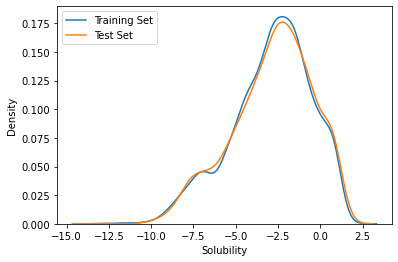

In [7]:
sns.kdeplot(y_train)
sns.kdeplot(y_test)
plt.legend(labels=['Training Set', 'Test Set'])
plt.show()

This shows that the dataset has been split into training and test sets which have an equal distribution of values within each other.

In [8]:
len(y_train)

7547

In [9]:
len(y_test)

2516

### Linear Regression

In [10]:
# build linear regresson model
regr = LinearRegression()

# fit model using training set
regr.fit(x_train, y_train)

LinearRegression()

In [11]:
# intercept value
regr.intercept_

-1.1824495543636697

In [12]:
# gradient value
regr.coef_

array([-0.38547809, -0.00348322,  0.06601821, -0.8618555 ])

In [13]:
# predict solubility values using the test set
regr_y_predict = regr.predict(x_test)

In [14]:
regr.score(x_train, y_train)

0.4483498149415768

In [15]:
regr.score(x_test, y_test)

0.4642945946311463

In [16]:
mean_squared_error(y_test, regr_y_predict)

# shows there is a high measure of error

3.0449390049201117

In [17]:
r2_score(y_test, regr_y_predict)

# shows poor goodness of fit

0.4642945946311463

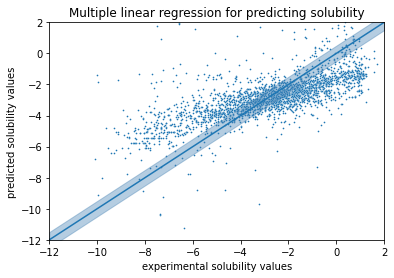

In [18]:
sns.scatterplot(x=y_test, y=regr_y_predict, s=3).set(title='Multiple linear regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

# plt.savefig('mlr_delaney.jpg', bbox_inches='tight')

### Random Forest

In [19]:
# build random forest regresson model
rf = RandomForestRegressor()

# fit model using training set
rf.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
# solubility values predicted using test labels
rf_y_predict = rf.predict(x_test)

In [21]:
rf.score(x_test, y_test)

0.6989759605007162

In [22]:
rf.score(x_train, y_train)

0.9556246065783114

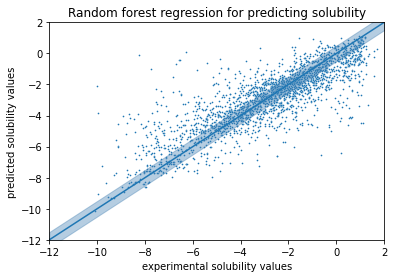

In [23]:
sns.scatterplot(x=y_test, y=rf_y_predict, s=3).set(title='Random forest regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

plt.savefig('rfr_delaney.jpg', bbox_inches='tight', dpi=300)

### Gradient Boosting

In [24]:
# build gradient boosting regressor model
gb = GradientBoostingRegressor()

# fit model using training set
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [25]:
# solubility values predicted using test labels
gb_y_predict = gb.predict(x_test)

In [26]:
gb.score(x_test, y_test)

0.6886184146536356

In [27]:
gb.score(x_train, y_train)

0.7258210639129793

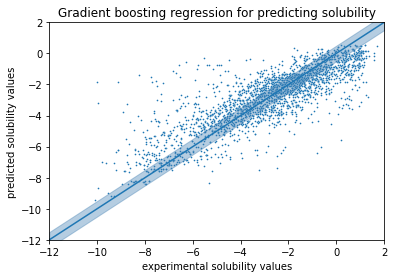

In [28]:
sns.scatterplot(x=y_test, y=gb_y_predict, s=3).set(title='Gradient boosting regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

### Support Vector Machine

In [29]:
# build svm regresson model
svm = SVR()

# fit model using training set
svm.fit(x_train, y_train)

SVR()

In [30]:
# solubility values predicted using test labels
svm_y_predict = svm.predict(x_test)

In [31]:
svm.score(x_test, y_test)

0.42324602673045386

In [32]:
svm.score(x_train, y_train)

0.4356820411119191

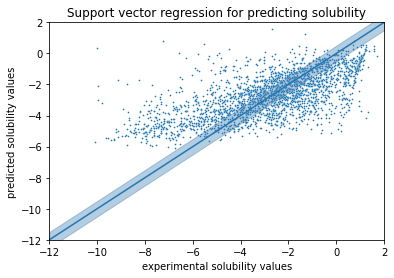

In [33]:
sns.scatterplot(x=y_test, y=svm_y_predict, s=3).set(title='Support vector regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

plt.savefig('svr_delaney.jpg', bbox_inches='tight', dpi=300)

## Using processed data

Applying Yeo-Johnson transformations to obtain normal distributions

In [34]:
# creating transformer which will carry out Yeo-Johnson transformation and also standardize the data
pt = PowerTransformer(method='yeo-johnson', standardize=True)

In [35]:
# transforming the raw data
x_trans = pt.fit_transform(x)

In [36]:
# these are the lambda values used for the transformation - it can be used for the inverse transformation later on
pt.lambdas_

array([ 1.0375007 , -0.02216257, -0.07755609, -0.36154414])

In [37]:
x_trans

array([[ 0.5619661 ,  0.997489  ,  1.87790037, -1.10318994],
       [ 0.1079018 , -0.54121184, -1.57303192,  1.39563994],
       [ 0.03456795, -0.88297656, -0.67362709,  1.1575748 ],
       ...,
       [ 0.22965574, -0.76036806, -0.67362709,  0.84911864],
       [ 0.89743129,  1.26354908,  1.60759573,  0.31889707],
       [ 0.45950981,  0.55859152,  0.44348679,  1.22683623]])

In [38]:
# reshape y so it can be transformed as well
reshaped_y = np.array(y).reshape(-1, 1)

In [39]:
# transform reshaped y values
y_trans = pt.fit_transform(reshaped_y)

In [40]:
# this is the lambda value used for the transformation - it can be used for the inverse transformation later on
pt.lambdas_

array([1.34567435])

In [41]:
y_trans

array([[-0.40758905],
       [-0.267122  ],
       [ 0.17890131],
       ...,
       [ 0.17326887],
       [-0.54524   ],
       [-0.83622588]])

In [42]:
# formatting y so it can be correctly inputted into the following models
y_trans = np.ravel(y_trans)

Now the data is normalized, we can input them into the same models as before and see if the predictive accuracy increases.

In [43]:
# split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_trans, y_trans, random_state=7)

### Linear Regression

In [44]:
# build linear regresson model
regr = LinearRegression()

# fit model using training set
regr.fit(x_train, y_train)

LinearRegression()

In [45]:
# intercept value
regr.intercept_

0.0018746520098863852

In [46]:
# gradient value
regr.coef_

array([-0.48245989, -0.41036854,  0.14903809, -0.09193571])

In [47]:
# predict solubility values using the test set
regr_y_predict = regr.predict(x_test)

In [48]:
regr.score(x_train, y_train)

0.5074777487627284

In [49]:
regr.score(x_test, y_test)

0.5244084193241798

In [50]:
mean_squared_error(y_test, regr_y_predict)

# shows there is a high measure of error

0.4869138246354178

In [51]:
# reshape y so it can be transformed 
reshaped_y_test = np.array(y_test).reshape(-1, 1)
reshaped_y_pred = np.array(regr_y_predict).reshape(-1, 1)

# inverse transform y
reshaped_y_test = pt.inverse_transform(reshaped_y_test)
regr_y_predict = pt.inverse_transform(reshaped_y_pred)

# change y back to a 1D array
reshaped_y_test = np.ravel(reshaped_y_test)
regr_y_predict = np.ravel(regr_y_predict)

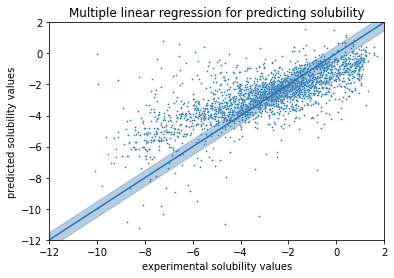

In [52]:
sns.scatterplot(x=reshaped_y_test, y=regr_y_predict, s=3).set(title='Multiple linear regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)
# plt.savefig('mlr_delaney.jpg', bbox_inches='tight')

### Random Forest

In [53]:
# build random forest regresson model
rf = RandomForestRegressor()

# fit model using training set
rf.fit(x_train, y_train)

RandomForestRegressor()

In [54]:
# solubility values predicted using test labels
rf_y_predict = rf.predict(x_test)

In [55]:
rf.score(x_test, y_test)

0.6929557492094024

In [56]:
rf.score(x_train, y_train)

0.9532447962089539

In [57]:
# reshape y so it can be transformed 
reshaped_y_pred = np.array(rf_y_predict).reshape(-1, 1)

# inverse transform y
rf_y_predict = pt.inverse_transform(reshaped_y_pred)

# change y back to a 1D array
rf_y_predict = np.ravel(rf_y_predict)

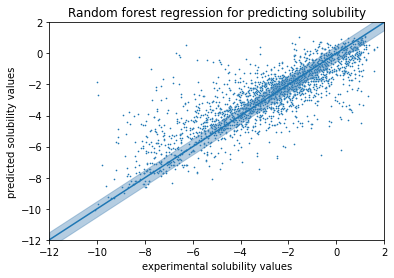

In [58]:
sns.scatterplot(x=reshaped_y_test, y=rf_y_predict, s=3).set(title='Random forest regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

plt.savefig('rfr_delaney_processed.jpg', bbox_inches='tight', dpi=300)

### Gradient Boosting

In [59]:
# build gradient boosting regressor model
gb = GradientBoostingRegressor()

# fit model using training set
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [60]:
# solubility values predicted using test labels
gb_y_predict = gb.predict(x_test)

In [61]:
gb.score(x_test, y_test)

0.6822941503946236

In [62]:
gb.score(x_train, y_train)

0.7128897151968872

In [63]:
# reshape y so it can be transformed 
reshaped_y_pred = np.array(gb_y_predict).reshape(-1, 1)

# inverse transform y
gb_y_predict = pt.inverse_transform(reshaped_y_pred)

# change y back to a 1D array
gb_y_predict = np.ravel(gb_y_predict)

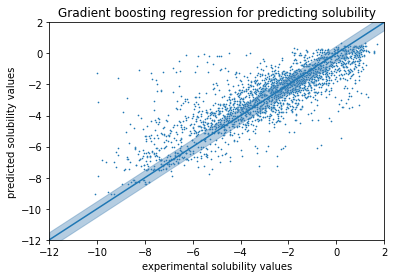

In [64]:
sns.scatterplot(x=reshaped_y_test, y=gb_y_predict, s=3).set(title='Gradient boosting regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

In [65]:
# check how many values fall within the allowed error boundary (of 0.5)
good_value_count = 0
for pred, exp in zip(gb_y_predict, reshaped_y_test):
    if exp - 0.5 <= pred <= exp + 0.5:
        good_value_count += 1

In [66]:
good_value_count

951

In [67]:
len(reshaped_y_test)

2516

In [68]:
print ('So', good_value_count / len(reshaped_y_test) * 100,'% of the test set are predicted within 0.5 of the experimental values.')

So 37.79809220985692 % of the test set are predicted within 0.5 of the experimental values.


### Support Vector Machine

In [69]:
# build svm regresson model
svm = SVR()

# fit model using training set
svm.fit(x_train, y_train)

SVR()

In [70]:
# solubility values predicted using test labels
svm_y_predict = svm.predict(x_test)

In [71]:
svm.score(x_test, y_test)

0.6640615997958822

In [72]:
svm.score(x_train, y_train)

0.6798821533831363

In [73]:
# reshape y so it can be transformed 
reshaped_y_pred = np.array(svm_y_predict).reshape(-1, 1)

# inverse transform y
svm_y_predict = pt.inverse_transform(reshaped_y_pred)

# change y back to a 1D array
svm_y_predict = np.ravel(svm_y_predict)

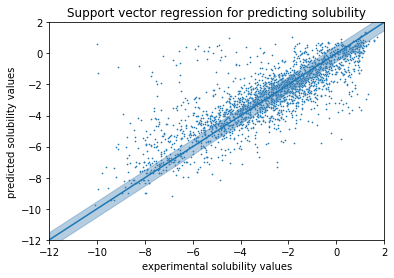

In [74]:
sns.scatterplot(x=reshaped_y_test, y=svm_y_predict, s=3).set(title='Support vector regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

plt.savefig('svr_delaney_processed.jpg', bbox_inches='tight', dpi=300)

## Using tuned parameters

In [75]:
rf = RandomForestRegressor()

In [76]:
# parameter grid containing hyperparameters to tune
param_grid = {'bootstrap': [True, False],
              'max_depth': [50, 100, 150, 200],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [2, 5, 10],
              'min_samples_split': [2, 4],
              'n_estimators': [int(x) for x in np.linspace(200, 2000, 10)]}

In [77]:
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=cvFold, verbose=2, random_state=7, n_jobs=-1)
results = rf_random.fit(x_train, y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


In [78]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 150,
 'bootstrap': True}

In [79]:
best_model = results.best_estimator_

In [80]:
best_model.score(x_test, y_test)

0.7039676113279804

In [81]:
best_model.score(x_train, y_train)

0.898417598603052

Results = {'n_estimators': 1800,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 150,
 'bootstrap': True}

Using these results:

In [106]:
rf = RandomForestRegressor(n_estimators=1800, min_samples_split=4,min_samples_leaf=2, max_features='sqrt', max_depth=150, bootstrap=True)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=150, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=1800)

In [107]:
rftuned_y_predict = rf.predict(x_test)

In [108]:
# reshape y so it can be transformed 
reshaped_y_pred = np.array(rftuned_y_predict).reshape(-1, 1)

# inverse transform y
rftuned_y_predict = pt.inverse_transform(reshaped_y_pred)

# change y back to a 1D array
rftuned_y_predict = np.ravel(rftuned_y_predict)

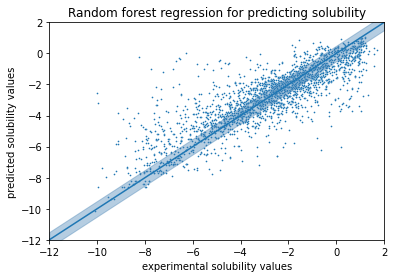

In [109]:
sns.scatterplot(x=reshaped_y_test, y=rftuned_y_predict, s=3).set(title='Random forest regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

plt.savefig('rf_tuned.jpg', bbox_inches='tight', dpi=300)

In [110]:
# check how many values fall within the allowed error boundary (of 0.5)
good_value_count = 0
for pred, exp in zip(rftuned_y_predict, reshaped_y_test):
    if exp - 0.5 <= pred <= exp + 0.5:
        good_value_count += 1

In [111]:
good_value_count

1127

In [112]:
len(reshaped_y_test)

2516

In [113]:
print ('So', good_value_count / len(reshaped_y_test) * 100,'% of the test set are predicted within 0.5 of the experimental values.')

So 44.7933227344992 % of the test set are predicted within 0.5 of the experimental values.


#### Visualisation

In [90]:
# visualisation of first tree in the forest
dot_data = export_graphviz(rf.estimators_[0], feature_names=list(x.columns), filled=True, impurity=True, rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('rf_solubility_visualisation')
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.278873 to fit


### Support Vector Machine

In [91]:
# build svm regression model
svm = SVR()

In [92]:
# making parameter grid of hyperparameters to tune
grid = {'kernel': ['linear', 'rbf', 'sigmoid', 'poly'], 
        'tol': [1e-3, 1e-4, 1e-5, 1e-6], 
        'C': [1, 1.5, 2, 2.5, 3]}

In [93]:
cvFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
gridSearch = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cvFold, scoring="neg_mean_squared_error")
results = gridSearch.fit(x_train, y_train)

In [94]:
gridSearch.best_params_

{'C': 3, 'kernel': 'rbf', 'tol': 0.0001}

In [95]:
best_model = results.best_estimator_

In [96]:
best_model.score(x_test, y_test)

0.6650253189551412

In [97]:
best_model.score(x_train, y_train)

0.6845980143870846

Best parameters are {'C': 3, 'kernel': 'rbf', 'tol': 1e-04}

In [114]:
svr = SVR(kernel='rbf', tol=1e-06, C=3)
svr.fit(x_train, y_train)

SVR(C=3, tol=1e-06)

In [115]:
svmtuned_y_predict = svr.predict(x_test)

In [116]:
# reshape y so it can be transformed 
reshaped_y_pred = np.array(svmtuned_y_predict).reshape(-1, 1)

# inverse transform y
svmtuned_y_predict = pt.inverse_transform(reshaped_y_pred)

# change y back to a 1D array
svmtuned_y_predict = np.ravel(svmtuned_y_predict)

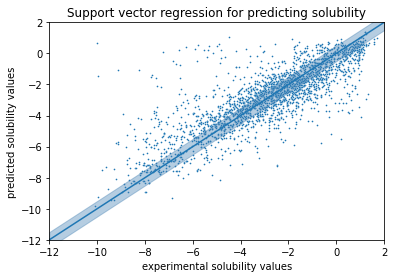

In [117]:
sns.scatterplot(x=reshaped_y_test, y=svmtuned_y_predict, s=3).set(title='Support vector regression for predicting solubility', xlabel='experimental solubility values', ylabel='predicted solubility values')

plt.xlim(-12, 2)
plt.ylim(-12, 2)

# plot x=y line showing where accurate predictions lie
sns.lineplot(x=[-12, 2], y=[-12, 2], alpha=1)

# shaded areas show values that lie within the accepted +- 0.5 error zone
exp_value = np.arange(-12, 3)
upper_bound = exp_value + 0.5
lower_bound = exp_value - 0.5
plt.fill_between(exp_value, upper_bound, lower_bound, color='steelblue', alpha=0.4)

plt.savefig('svr_tuned.jpg', bbox_inches='tight', dpi=300)

In [118]:
# check how many values fall within the allowed error boundary (of 0.5)
good_value_count = 0
for pred, exp in zip(svmtuned_y_predict, reshaped_y_test):
    if exp - 0.5 <= pred <= exp + 0.5:
        good_value_count += 1

In [119]:
good_value_count

1036

In [120]:
len(reshaped_y_test)

2516

In [121]:
print ('So', good_value_count / len(reshaped_y_test) * 100,'% of the test set are predicted within 0.5 of the experimental values.')

So 41.17647058823529 % of the test set are predicted within 0.5 of the experimental values.
